In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

from utils.plotting import _plot_element
from database.MIMIC_cache_exp import MIMIC_cache_discretized_joint_exp_independent_measurement

## Definition:
1. dead patient: patient died at the end of trajectory
1. live patient: patient lived at the end of trajectory


## RL state generated by RNN
1. Cache exp with 48h patient trajectory

In [2]:
# load experience
cashe_dir = '../RL_exp_cache/1024-15mins-24hrs-joint-indep-measurement-rnn-all-pataient/'
batch_size = 500000
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess:
        mimic_exp = MIMIC_cache_discretized_joint_exp_independent_measurement(cache_dir=cashe_dir)
        test_loader = mimic_exp.gen_test_experience(sess, batch_size=batch_size, shuffle=True)
        
        for idx, the_dict in enumerate(test_loader):
            data_dict = the_dict
            break

In [3]:
data_dict.keys()

dict_keys(['cur_state', 'next_state', 'gain_per_action', 'prob_gain_per_action', 'std_gain_per_action', 'cur_action', 'next_action', 'labels', 'patient_inds', 'the_steps', 'total_steps', 'gain_joint', 'prob_joint', 'std_joint', 'prob_null', 'std_null', 'prev_prob_joint', 'prev_std_joint'])

In [4]:
exp_df = pd.DataFrame({k: data_dict[k] for k in ['patient_inds', 'labels', 'the_steps', 'total_steps']})
patient_final_status  = exp_df.groupby('patient_inds')['labels'].apply(lambda x: max(x))

live_patient_inds = patient_final_status[patient_final_status != 1]
dead_patient_inds = patient_final_status[patient_final_status == 1]

exp_df_live = exp_df.join(live_patient_inds, on='patient_inds', how='right', rsuffix='_final')
exp_df_dead = exp_df.join(dead_patient_inds, on='patient_inds', how='right', rsuffix='_final')

In [5]:
exp_df_live.head(5)

,patient_inds,labels,the_steps,total_steps,labels_final
0,46,0,74,96,0
66,46,0,93,96,0
83,46,0,40,96,0
117,46,0,38,96,0
155,46,0,50,96,0


In [6]:
len(exp_df_live['patient_inds'].unique())

5078

In [7]:
exp_df_dead.head(5)

,patient_inds,labels,the_steps,total_steps,labels_final
32,48,0,31,96,1
64,48,1,83,96,1
76,48,1,87,96,1
85,48,1,93,96,1
176,48,1,52,96,1


In [8]:
len(exp_df_dead['patient_inds'].unique())

477

### Viasulize state space for last four-hour of dead and live patients

In [9]:
idx_live = exp_df_live[exp_df_live['the_steps'] >= exp_df_live['total_steps'] * 20 / 24].index
idx_dead = exp_df_dead[exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 20 / 24].index
state_live = data_dict['cur_state'][list(idx_live)]
state_dead = data_dict['cur_state'][list(idx_dead)]
state_all = np.concatenate([state_live, state_dead], axis=0)
labels = np.concatenate([np.zeros(len(state_live)), np.ones(len(state_dead))])

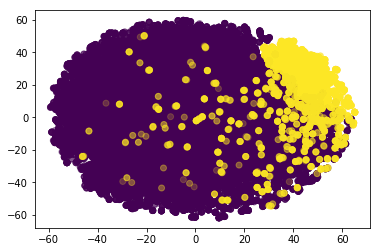

In [10]:
embedding = TSNE(n_components=2, init='pca', random_state=0).fit_transform(state_all)
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, alpha=0.2)
plt.show()

### Viasulize state space for first and last four-hour of live patients

In [11]:
idx_live = exp_df_live[exp_df_live['the_steps'] <= exp_df_live['total_steps'] * 4 / 24].index
idx_dead = exp_df_live[exp_df_live['the_steps'] >= exp_df_live['total_steps'] * 20 / 24].index
state_live = data_dict['cur_state'][list(idx_live)]
state_dead = data_dict['cur_state'][list(idx_dead)]
state_all = np.concatenate([state_live, state_dead], axis=0)
labels = np.concatenate([np.zeros(len(state_live)), np.ones(len(state_dead))])

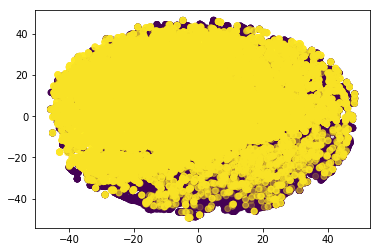

In [12]:
embedding = TSNE(n_components=2, init='pca', random_state=0).fit_transform(state_all)
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, alpha=0.2)
plt.show()

### Viasulize state space for first and last four-hour of dead patients

In [13]:
idx_live = exp_df_dead[exp_df_dead['the_steps'] <= exp_df_dead['total_steps'] * 4 / 24].index
idx_dead = exp_df_dead[exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 20 / 24].index
state_live = data_dict['cur_state'][list(idx_live)]
state_dead = data_dict['cur_state'][list(idx_dead)]
state_all = np.concatenate([state_live, state_dead], axis=0)
labels = np.concatenate([np.zeros(len(state_live)), np.ones(len(state_dead))])

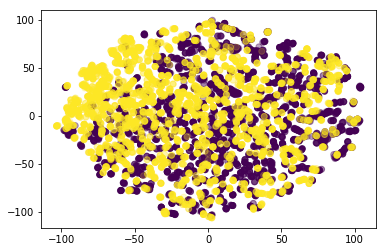

In [14]:
embedding = TSNE(n_components=2, init='pca', random_state=0).fit_transform(state_all)
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, alpha=0.2)
plt.show()

## RL state generated using MGP-RNN
1. Cache exp with 48h patient trajectory

In [33]:
# load experience
cashe_dir = '../RL_exp_cache/1020-15mins-24hrs-joint-indep-measurement/'
batch_size = 500000
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

tf.reset_default_graph()
with tf.Session(config=config) as sess:
        mimic_exp = MIMIC_cache_discretized_joint_exp_independent_measurement(cache_dir=cashe_dir)
        test_loader = mimic_exp.gen_test_experience(sess, batch_size=batch_size, shuffle=True)
        
        for idx, the_dict in enumerate(test_loader):
            data_dict = the_dict
            break

In [34]:
data_dict.keys()

dict_keys(['cur_state', 'next_state', 'gain_per_action', 'prob_gain_per_action', 'std_gain_per_action', 'cur_action', 'next_action', 'labels', 'patient_inds', 'the_steps', 'total_steps', 'gain_joint', 'prob_joint', 'std_joint', 'prob_null', 'std_null', 'prev_prob_joint', 'prev_std_joint'])

In [35]:
exp_df = pd.DataFrame({k: data_dict[k] for k in ['patient_inds', 'labels', 'the_steps', 'total_steps']})
patient_final_status  = exp_df.groupby('patient_inds')['labels'].apply(lambda x: max(x))

live_patient_inds = patient_final_status[patient_final_status != 1]
dead_patient_inds = patient_final_status[patient_final_status == 1]

exp_df_live = exp_df.join(live_patient_inds, on='patient_inds', how='right', rsuffix='_final')
exp_df_dead = exp_df.join(dead_patient_inds, on='patient_inds', how='right', rsuffix='_final')

In [36]:
exp_df_live.head(5)

,patient_inds,labels,the_steps,total_steps,labels_final


In [37]:
len(exp_df_live['patient_inds'].unique())

0

In [38]:
exp_df_dead.head(5)

,patient_inds,labels,the_steps,total_steps,labels_final
0,362,0,21,96,1
213,362,0,54,96,1
475,362,0,31,96,1
677,362,0,5,96,1
712,362,0,48,96,1


In [39]:
len(exp_df_dead['patient_inds'].unique())

522

### Viasulize state space for first and last four-hour of dead patients

In [41]:
idx_live = exp_df_dead[exp_df_dead['the_steps'] <= exp_df_dead['total_steps'] * 4 / 48].index
idx_dead = exp_df_dead[exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 44 / 48].index
state_live = data_dict['cur_state'][list(idx_live)]
state_dead = data_dict['cur_state'][list(idx_dead)]
state_all = np.concatenate([state_live, state_dead], axis=0)
labels = np.concatenate([np.zeros(len(state_live)), np.ones(len(state_dead))])

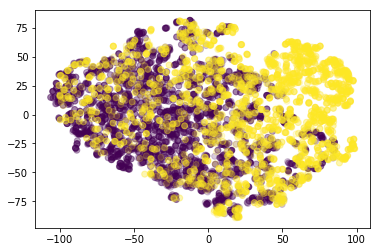

In [42]:
embedding = TSNE(n_components=2, init='pca', random_state=0).fit_transform(state_all)
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, alpha=0.2)
plt.show()

### Viasulize state space for last four-hour and 24-28hour of dead patient

In [43]:
idx_live = exp_df_dead[(exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 24 / 48) & (exp_df_dead['the_steps'] <= exp_df_dead['total_steps'] * 28 / 48)].index
idx_dead = exp_df_dead[exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 44 / 48].index
state_live = data_dict['cur_state'][list(idx_live)]
state_dead = data_dict['cur_state'][list(idx_dead)]
state_all = np.concatenate([state_live, state_dead], axis=0)
labels = np.concatenate([np.zeros(len(state_live)), np.ones(len(state_dead))])

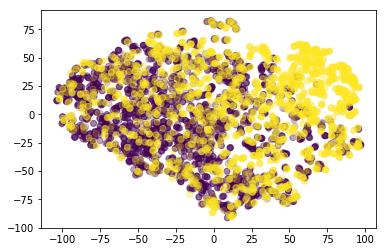

In [44]:
embedding = TSNE(n_components=2, init='pca', random_state=0).fit_transform(state_all)
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, alpha=0.2)
plt.show()

### Viasulize state space for last four-hour and 28-32 hour of dead patient

In [45]:
idx_live = exp_df_dead[(exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 28 / 48) & (exp_df_dead['the_steps'] <= exp_df_dead['total_steps'] * 32 / 48)].index
idx_dead = exp_df_dead[exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 44 / 48].index
state_live = data_dict['cur_state'][list(idx_live)]
state_dead = data_dict['cur_state'][list(idx_dead)]
state_all = np.concatenate([state_live, state_dead], axis=0)
labels = np.concatenate([np.zeros(len(state_live)), np.ones(len(state_dead))])

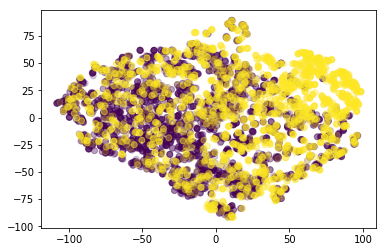

In [46]:
embedding = TSNE(n_components=2, init='pca', random_state=0).fit_transform(state_all)
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, alpha=0.2)
plt.show()

### Viasulize state space for last four-hour and 40-44 hour of dead patient

In [48]:
idx_live = exp_df_dead[(exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 40 / 48) & (exp_df_dead['the_steps'] <= exp_df_dead['total_steps'] * 44 / 48)].index
idx_dead = exp_df_dead[exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 44 / 48].index
state_live = data_dict['cur_state'][list(idx_live)]
state_dead = data_dict['cur_state'][list(idx_dead)]
state_all = np.concatenate([state_live, state_dead], axis=0)
labels = np.concatenate([np.zeros(len(state_live)), np.ones(len(state_dead))])

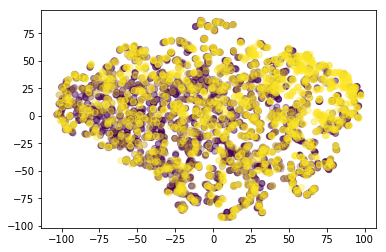

In [49]:
embedding = TSNE(n_components=2, init='pca', random_state=0).fit_transform(state_all)
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, alpha=0.2)
plt.show()

### Viasulize state space for last four-hour and 28-32 hour of dead patient

In [50]:
idx_live = exp_df_dead[(exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 28 / 48) & (exp_df_dead['the_steps'] <= exp_df_dead['total_steps'] * 32 / 48)].index
idx_dead = exp_df_dead[exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 44 / 48].index
idx_dead_last = exp_df_dead[exp_df_dead['the_steps'] >= exp_df_dead['total_steps'] * 47 / 48].index
state_live = data_dict['cur_state'][list(idx_live)]
state_dead = data_dict['cur_state'][list(idx_dead)]
state_dead_last = data_dict['cur_state'][list(idx_dead_last)]
state_all = np.concatenate([state_live, state_dead, state_dead_last], axis=0)
labels = np.concatenate([np.zeros(len(state_live)), np.ones(len(state_dead)), np.ones(len(state_dead_last)) * 2])

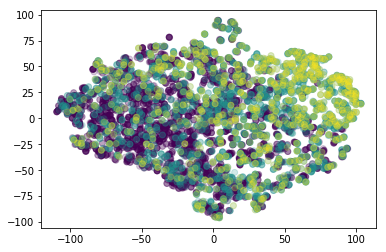

In [51]:
embedding = TSNE(n_components=2, init='pca', random_state=0).fit_transform(state_all)

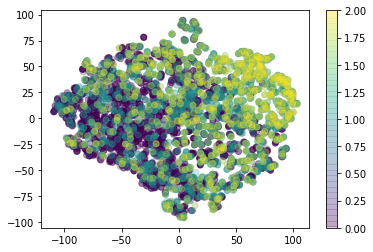

In [53]:
plt.figure()
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, alpha=0.2)
plt.colorbar()
plt.show()

# Observation:
1. with MGP-RNN, the state embedding looks more differetiable than RNN with forward imputation 